In [3]:
import os
import numpy
import pandas
idx=pandas.IndexSlice
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
#from pandas.plotting import autocorrelation_plot
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
import sklearn.linear_model


In [4]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":5
}
plt.rcParams.update(params)

In [5]:
def getfile(location_pair,**kwargs): #tries to get local version and then defaults to google drive version
    (loc,gdrive)=location_pair
    try:
        out=pandas.read_csv(loc,**kwargs)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]
        out=pandas.read_csv(loc,**kwargs)
    return out

In [6]:
fname=("uiuc-gpa-dataset.csv","https://drive.google.com/file/d/17iMVJ64MWmxCTf-oP779c3vrA3UGFCOI/view?usp=sharing")

In [7]:
data_raw = getfile(fname)
data_raw.head()

local file not found; accessing Google Drive


,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,B-,C+,C,C-,D+,D,D-,F,W,Primary Instructor
0,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,2,14,2,...,3,0,1,0,0,0,0,0,0,"Zheng, Reanne"
1,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,0,15,0,...,1,0,2,0,0,0,0,1,0,"Atienza, Paul Michael L"
2,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,OD,7,4,1,...,0,2,3,0,0,1,0,1,0,"Wang, Yu"
3,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,1,18,0,...,1,0,0,0,0,0,0,0,0,"Zheng, Reanne"
4,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,0,16,1,...,1,0,2,0,0,0,0,0,0,"Atienza, Paul Michael L"


In [8]:
#data_raw.to_pickle("./working_dataset.pkl")

In [9]:
data_raw['Subject'].value_counts()

ECON    3498
ACCY    2543
MATH    2482
BADM    2446
MCB     2107
        ... 
GRKM       2
CB         2
JS         2
HNDI       1
DTX        1
Name: Subject, Length: 168, dtype: int64

In [10]:
debugging_df = data_raw.groupby('Subject').filter(lambda x: len(x)>10).sample(n=500, random_state=42)
debugging_df.head()

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,B-,C+,C,C-,D+,D,D-,F,W,Primary Instructor
28714,2016,Spring,2016-sp,ECON,203,Economic Statistics II,LAB,0,5,2,...,1,6,6,1,2,2,6,0,0,"Stevens, Alexander N"
34996,2015,Summer,2015-su,ANSC,331,Biology of Reproduction,ONL,6,6,4,...,0,0,2,0,0,0,0,0,0,"Nowak, Romana A"
9827,2020,Winter,2020-wi,FSHN,120,Contemporary Nutrition,ONL,0,58,0,...,0,0,6,0,0,3,0,0,1,"Burkhalter, Toni M"
53466,2011,Summer,2011-su,ACCY,512,Risk Measurement/Reporting II,LCD,2,25,6,...,0,0,0,0,0,0,0,0,0,"Schwartz, Rachel"
57642,2010,Fall,2010-fa,HIST,439,The Ottoman Empire,LCD,1,11,3,...,2,1,0,0,0,0,0,3,1,"Todorova, Maria N"


In [11]:
debugging_df['Subject'].value_counts()

ECON    30
BADM    24
CS      22
MATH    22
PSYC    19
        ..
REL      1
ACES     1
ENSU     1
ATMS     1
HRD      1
Name: Subject, Length: 100, dtype: int64

In [12]:
# debugging_df.to_pickle("./debugging_dataset.pkl")

In [13]:
def getpickle(location_pair,**kwargs): #tries to get local version and then defaults to google drive version
    (loc,gdrive)=location_pair
    try:
        out=pandas.read_pickle(loc,**kwargs)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]
        out=pandas.read_pickle(loc,**kwargs)
    return out

In [14]:
fname=("working_dataset.pkl", "https://drive.google.com/file/d/1ihNXt1tef8zR7CqvAtooysEC7b5dyYkZ/view?usp=sharing")
data = getpickle(fname) 
data.head()

local file not found; accessing Google Drive


,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,B-,C+,C,C-,D+,D,D-,F,W,Primary Instructor
0,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,2,14,2,...,3,0,1,0,0,0,0,0,0,"Zheng, Reanne"
1,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,0,15,0,...,1,0,2,0,0,0,0,1,0,"Atienza, Paul Michael L"
2,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,OD,7,4,1,...,0,2,3,0,0,1,0,1,0,"Wang, Yu"
3,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,1,18,0,...,1,0,0,0,0,0,0,0,0,"Zheng, Reanne"
4,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,0,16,1,...,1,0,2,0,0,0,0,0,0,"Atienza, Paul Michael L"


In [15]:
print(data.shape)

(61557, 22)


In [16]:
data.columns

Index(['Year', 'Term', 'YearTerm', 'Subject', 'Number', 'Course Title',
       'Sched Type', 'A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+',
       'D', 'D-', 'F', 'W', 'Primary Instructor'],
      dtype='object')

In [17]:
data['Year'].value_counts()

2011    7970
2010    5423
2015    5218
2017    5093
2021    5092
2013    5045
2019    5041
2018    5029
2016    4969
2014    4957
2020    4855
2012    2865
Name: Year, dtype: int64

In [18]:
data

,Year,Term,YearTerm,Subject,Number,Course Title,Sched Type,A+,A,A-,...,B-,C+,C,C-,D+,D,D-,F,W,Primary Instructor
0,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,2,14,2,...,3,0,1,0,0,0,0,0,0,"Zheng, Reanne"
1,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,0,15,0,...,1,0,2,0,0,0,0,1,0,"Atienza, Paul Michael L"
2,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,OD,7,4,1,...,0,2,3,0,0,1,0,1,0,"Wang, Yu"
3,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,1,18,0,...,1,0,0,0,0,0,0,0,0,"Zheng, Reanne"
4,2021,Fall,2021-fa,AAS,100,Intro Asian American Studies,DIS,0,16,1,...,1,0,2,0,0,0,0,0,0,"Atienza, Paul Michael L"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61552,2010,Summer,2010-su,STAT,410,Statistics and Probability II,LEC,5,10,2,...,1,0,1,3,0,0,0,2,1,"Stepanov, Alexei G"
61553,2010,Summer,2010-su,STAT,440,Statistical Data Management,LEC,4,12,8,...,0,0,0,0,0,0,0,0,0,"Unger, David"
61554,2010,Summer,2010-su,TAM,212,Introductory Dynamics,LEC,0,1,3,...,7,5,1,1,0,2,0,1,0,"Morgan, William T"
61555,2010,Summer,2010-su,TAM,251,Introductory Solid Mechanics,LCD,1,2,2,...,0,3,3,2,0,0,1,1,0,"Ott-Monsivais, Stephanie"


#Milestone 2

In [19]:
#label Encoding Term and dropping YearTerm

from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df=data
# Encode labels in column 'species'.
df['Term']= label_encoder.fit_transform(df['Term'])
df = df.drop('YearTerm', axis=1)


In [20]:
df

,Year,Term,Subject,Number,Course Title,Sched Type,A+,A,A-,B+,...,B-,C+,C,C-,D+,D,D-,F,W,Primary Instructor
0,2021,0,AAS,100,Intro Asian American Studies,DIS,2,14,2,3,...,3,0,1,0,0,0,0,0,0,"Zheng, Reanne"
1,2021,0,AAS,100,Intro Asian American Studies,DIS,0,15,0,3,...,1,0,2,0,0,0,0,1,0,"Atienza, Paul Michael L"
2,2021,0,AAS,100,Intro Asian American Studies,OD,7,4,1,1,...,0,2,3,0,0,1,0,1,0,"Wang, Yu"
3,2021,0,AAS,100,Intro Asian American Studies,DIS,1,18,0,2,...,1,0,0,0,0,0,0,0,0,"Zheng, Reanne"
4,2021,0,AAS,100,Intro Asian American Studies,DIS,0,16,1,3,...,1,0,2,0,0,0,0,0,0,"Atienza, Paul Michael L"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61552,2010,2,STAT,410,Statistics and Probability II,LEC,5,10,2,2,...,1,0,1,3,0,0,0,2,1,"Stepanov, Alexei G"
61553,2010,2,STAT,440,Statistical Data Management,LEC,4,12,8,1,...,0,0,0,0,0,0,0,0,0,"Unger, David"
61554,2010,2,TAM,212,Introductory Dynamics,LEC,0,1,3,2,...,7,5,1,1,0,2,0,1,0,"Morgan, William T"
61555,2010,2,TAM,251,Introductory Solid Mechanics,LCD,1,2,2,1,...,0,3,3,2,0,0,1,1,0,"Ott-Monsivais, Stephanie"


In [21]:
#Creatinig a New Column CourseCode by combining Subject, Number and dropping the Course Title, Subject and Number Columns

df["CourseCode"] = (data["Subject"] + " " + df["Number"].astype('str'))
df.drop(['Course Title','Subject','Number'],axis=1,inplace=True)

In [22]:
df.head()

,Year,Term,Sched Type,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Primary Instructor,CourseCode
0,2021,0,DIS,2,14,2,3,5,3,0,1,0,0,0,0,0,0,"Zheng, Reanne",AAS 100
1,2021,0,DIS,0,15,0,3,5,1,0,2,0,0,0,0,1,0,"Atienza, Paul Michael L",AAS 100
2,2021,0,OD,7,4,1,1,7,0,2,3,0,0,1,0,1,0,"Wang, Yu",AAS 100
3,2021,0,DIS,1,18,0,2,4,1,0,0,0,0,0,0,0,0,"Zheng, Reanne",AAS 100
4,2021,0,DIS,0,16,1,3,5,1,0,2,0,0,0,0,0,0,"Atienza, Paul Michael L",AAS 100


# Converting Grades to a Overall GPA Value for every single Course and Instructor

In [23]:
## Need to Convert the Grades to a Overall Gpa Value
# First we will Drop the 'W' Column and define the Grades as well as their corresponding Weightage
df.drop(['W'],axis=1,inplace=True)
grades = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']
WEIGHT = [4.00, 4.00, 3.67, 3.33, 3, 2.67, 2.33, 2, 1.67, 1.33, 1, 0.67, 0]
df['GPA'] = df[grades].mul(WEIGHT).sum(1)/df[grades].sum(axis=1)


In [24]:
#drop the Grades Column since we do not really need it
df_new=df.drop(grades,axis=1)


In [25]:
##The Newly Computed GPA Values
df_new

,Year,Term,Sched Type,Primary Instructor,CourseCode,GPA
0,2021,0,DIS,"Zheng, Reanne",AAS 100,3.544667
1,2021,0,DIS,"Atienza, Paul Michael L",AAS 100,3.394815
2,2021,0,OD,"Wang, Yu",AAS 100,3.098519
3,2021,0,DIS,"Zheng, Reanne",AAS 100,3.743462
4,2021,0,DIS,"Atienza, Paul Michael L",AAS 100,3.547500
...,...,...,...,...,...,...
61552,2010,2,LEC,"Stepanov, Alexei G",STAT 410,3.183226
61553,2010,2,LEC,"Unger, David",STAT 440,3.774643
61554,2010,2,LEC,"Morgan, William T",TAM 212,2.595714
61555,2010,2,LCD,"Ott-Monsivais, Stephanie",TAM 251,2.603333


In [26]:
df['GPA'].describe()

count    61557.000000
mean         3.356943
std          0.399213
min          1.142857
25%          3.102609
50%          3.411548
75%          3.667778
max          3.995350
Name: GPA, dtype: float64

In [27]:
## This is the Course + Instructor Wise Average GPA


instructor_Course = df.groupby(['Primary Instructor', 'CourseCode'])['GPA'].mean().reset_index()
print(instructor_Course)

            Primary Instructor CourseCode       GPA
0           Aadland, Matthew A   GEOG 101  3.065463
1           Abbamonte, Peter M   PHYS 402  3.405047
2           Abbamonte, Peter M   PHYS 435  3.154046
3           Abbamonte, Peter M   PHYS 436  3.284651
4           Abbamonte, Peter M   PHYS 486  2.879787
...                        ...        ...       ...
17453     van der Veen, Renske   CHEM 442  2.914418
17454  van der Velde, Adrian T   HIST 100  3.022333
17455  van der Velde, Adrian T   HIST 255  3.667391
17456  van der Velde, Adrian T   HIST 308  3.051538
17457     van der Zande, Arend     ME 370  3.435548

[17458 rows x 3 columns]


In [28]:
import numpy as np
import pandas as pd
import seaborn as sns

In [29]:
instructor_Course

,Primary Instructor,CourseCode,GPA
0,"Aadland, Matthew A",GEOG 101,3.065463
1,"Abbamonte, Peter M",PHYS 402,3.405047
2,"Abbamonte, Peter M",PHYS 435,3.154046
3,"Abbamonte, Peter M",PHYS 436,3.284651
4,"Abbamonte, Peter M",PHYS 486,2.879787
...,...,...,...
17453,"van der Veen, Renske",CHEM 442,2.914418
17454,"van der Velde, Adrian T",HIST 100,3.022333
17455,"van der Velde, Adrian T",HIST 255,3.667391
17456,"van der Velde, Adrian T",HIST 308,3.051538


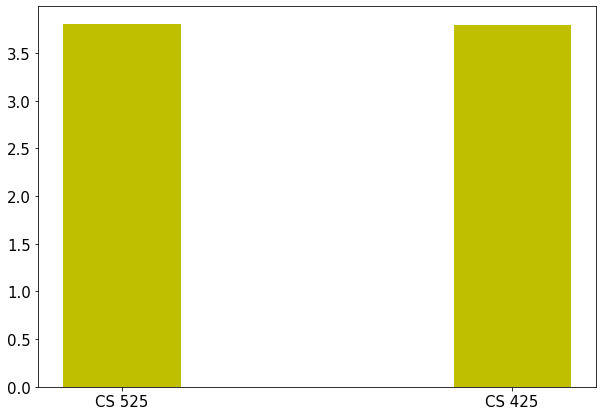

In [31]:
# Given a Instructor Name, plot average GPA of all Courses Taught by that Instructor 

from matplotlib import pyplot as plt

def plot_course(df,instructor_name):
  test= df.loc[df['Primary Instructor'] == instructor_name]
  fig = plt.figure(figsize =(10, 7))
  plt.bar(test['CourseCode'], test['GPA'],width = 0.3,color='y')

plot_course(df,'Gupta, Indranil')

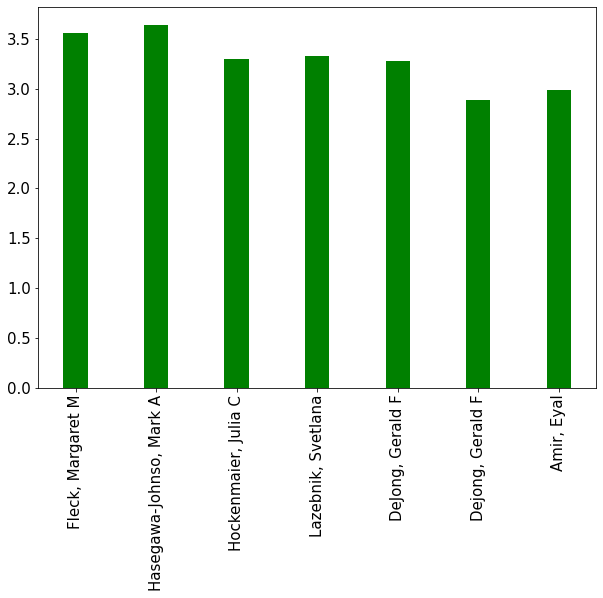

In [ ]:
# Given a Course, plot average GPA for that Course for All Instructors 

from matplotlib import pyplot as plt

def plot_instructor(df,course):
  test= df.loc[df['CourseCode'] == course]
  fig = plt.figure(figsize =(10, 7))
  plt.bar(test['Primary Instructor'], test['GPA'],width = 0.3,color='g')
  plt.xticks(rotation=90)

plot_instructor(df,'CS 440')

In [ ]:
df_new

,Year,Term,Sched Type,Primary Instructor,CourseCode,GPA
0,2021,0,DIS,"Zheng, Reanne",AAS 100,3.544667
1,2021,0,DIS,"Atienza, Paul Michael L",AAS 100,3.394815
2,2021,0,OD,"Wang, Yu",AAS 100,3.098519
3,2021,0,DIS,"Zheng, Reanne",AAS 100,3.743462
4,2021,0,DIS,"Atienza, Paul Michael L",AAS 100,3.547500
...,...,...,...,...,...,...
61552,2010,2,LEC,"Stepanov, Alexei G",STAT 410,3.183226
61553,2010,2,LEC,"Unger, David",STAT 440,3.774643
61554,2010,2,LEC,"Morgan, William T",TAM 212,2.595714
61555,2010,2,LCD,"Ott-Monsivais, Stephanie",TAM 251,2.603333


In [ ]:
df_new.isna().sum()

Year                      0
Term                      0
Sched Type            10053
Primary Instructor      171
CourseCode                0
GPA                       0
dtype: int64

In [ ]:
## dropping all the rows with Null values
df_notna = df_new.dropna()

In [ ]:
 df_notna

,Year,Term,Sched Type,Primary Instructor,CourseCode,GPA
0,2021,0,DIS,"Zheng, Reanne",AAS 100,3.544667
1,2021,0,DIS,"Atienza, Paul Michael L",AAS 100,3.394815
2,2021,0,OD,"Wang, Yu",AAS 100,3.098519
3,2021,0,DIS,"Zheng, Reanne",AAS 100,3.743462
4,2021,0,DIS,"Atienza, Paul Michael L",AAS 100,3.547500
...,...,...,...,...,...,...
61552,2010,2,LEC,"Stepanov, Alexei G",STAT 410,3.183226
61553,2010,2,LEC,"Unger, David",STAT 440,3.774643
61554,2010,2,LEC,"Morgan, William T",TAM 212,2.595714
61555,2010,2,LCD,"Ott-Monsivais, Stephanie",TAM 251,2.603333


In [ ]:
 df_notna.head()

,Year,Term,Sched Type,Primary Instructor,CourseCode,GPA
0,2021,0,DIS,"Zheng, Reanne",AAS 100,3.544667
1,2021,0,DIS,"Atienza, Paul Michael L",AAS 100,3.394815
2,2021,0,OD,"Wang, Yu",AAS 100,3.098519
3,2021,0,DIS,"Zheng, Reanne",AAS 100,3.743462
4,2021,0,DIS,"Atienza, Paul Michael L",AAS 100,3.547500


In [ ]:

##There are multiple rows present where the columns Year,Term,Sched Type, Primary Instructor and Course Code have the exact same value. We can combine these rows and take average over the GPA column

df_final = df_notna.groupby(['Year','Term','Sched Type','Primary Instructor', 'CourseCode'])['GPA'].mean().reset_index()


In [ ]:
df_final

,Year,Term,Sched Type,Primary Instructor,CourseCode,GPA
0,2010,0,CNF,"Faughn, Shirley J",CMN 304,3.885312
1,2010,0,CNF,"Hicks, Stewart R",ARCH 101,2.911854
2,2010,0,CNF,"Kelley, Margaret S",SOC 396,2.421304
3,2010,0,CNF,"Lapunzina, Alejandro",ARCH 199,3.430625
4,2010,0,CNF,"Lapunzina, Alejandro",ARCH 409,3.395833
...,...,...,...,...,...,...
38643,2021,3,ONL,"Tomkin, Jonathan H",ESE 360,3.111429
38644,2021,3,ONL,"Vazquez, Jose J",ECON 437,3.771343
38645,2021,3,ONL,"White, Judith B",BADM 310,3.888047
38646,2021,3,ONL,"Woodson, Markisha J",CHLH 101,3.222222


In [ ]:
one_hot_encoded_data = pd.get_dummies(df_final, columns = ['Sched Type', 'Primary Instructor','CourseCode'])


In [ ]:
one_hot_encoded_data

,Year,Term,GPA,Sched Type_CNF,Sched Type_DIS,Sched Type_INT,Sched Type_Int,Sched Type_LAB,Sched Type_LBD,Sched Type_LCD,...,CourseCode_VM 609,CourseCode_VM 610,CourseCode_VM 611,CourseCode_VM 620,CourseCode_VM 651,CourseCode_VM 652,CourseCode_VM 653,CourseCode_VM 654,CourseCode_YDSH 220,CourseCode_YDSH 320
0,2010,0,3.885312,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010,0,2.911854,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010,0,2.421304,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,0,3.430625,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010,0,3.395833,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38643,2021,3,3.111429,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38644,2021,3,3.771343,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38645,2021,3,3.888047,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38646,2021,3,3.222222,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

Y = one_hot_encoded_data['GPA']
X = one_hot_encoded_data.drop('GPA',axis=1)
X_train, X_test,y_train, y_test = train_test_split(X,Y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [ ]:
## training a linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)


In [ ]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)
df_pred.to_csv('ActualvsPredicted')

         Actual  Predicted
22116  3.217366   3.204229
11790  3.133375   3.441633
23114  3.039200   3.216145
19170  2.991250   3.085438
27016  3.631340   3.716214
...         ...        ...
3242   3.191091   2.973507
18444  2.933333   2.611287
8577   3.291290   3.450162
30261  3.389787   3.308372
36579  3.128077   3.475533

[9662 rows x 2 columns]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 28770669.98
Mean squared error: 18190633889926356.00
Root mean squared error: 134872658.05


In [ ]:
from google.colab import files
df_preds.to_csv('ActualvsPredicted.csv')
files.download('ActualvsPredicted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(regressor, open(filename, 'wb'))
files.download('finalized_model.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>